<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_581/NGC_581.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 2.8MB/s 
     |████████████████████████████████| 2.7MB 31.6MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=de66e6065e4d432ab09488d6ef24aa8cdbc438274152ee38c0ec199e6be89482
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC581 center

coordinate = coord.SkyCoord.from_name('NGC581')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (23.34583333, 60.65)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 509862821919372288',509862821919372288,47528498,2015.5,23.342139,1.604631,60.649335,1.924199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,0,74,3,-1.690774,50.439827,0.000000,0.000000,3,False,0.013024,NaN,NaN,0.064572,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.050758,-1.805004,49.391006,46.257850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001937
1,1635721458409799680,b'Gaia DR2 509862821917654528',509862821917654528,1136255935,2015.5,23.348224,0.139566,60.647837,0.177842,-0.117917,0.265819,-0.443600,-0.968698,0.239517,-0.755574,0.333036,-0.344465,0.233086,-0.361592,0.023643,-0.111166,-0.073079,-0.014817,-0.328323,0.382878,-0.534408,431,9,430,1,-0.220854,417.933929,0.000000,0.000000,31,False,0.280584,1.500798,0.040730,-0.014264,...,475.126210,6.379536,74.476608,18.069897,1.413960,0,1.256254,0.423300,0.832954,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.053945,-1.805999,49.393524,46.255003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002456
2,1635721458409799680,b'Gaia DR2 509862821917646848',509862821917646848,155749623,2015.5,23.344755,1.478474,60.652509,1.737626,5.535791,2.359475,2.346196,3.956021,2.288899,0.605896,3.020984,0.068784,0.569105,-0.225318,-0.318779,-0.304135,-0.396514,-0.257745,0.012941,0.018103,0.083448,102,0,100,2,2.308400,129.681671,3.333368,1.373995,31,False,0.013662,1.700624,0.358144,0.133700,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.051509,-1.801664,49.395005,46.259868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002566
3,1635721458409799680,b'Gaia DR2 509862821917646976',509862821917646976,324531031,2015.5,23.344351,0.267437,60.652526,0.315644,1.245240,0.500280,2.489087,-2.935483,0.498879,4.157978,0.617648,-0.325415,0.187524,-0.255984,0.024045,-0.270366,-0.010201,-0.091205,-0.220582,0.272263,-0.549402,435,0,433,2,10.904075,831.817810,2.098145,6.998055,31,False,0.069347,1.523048,0.080300,-0.036152,...,359.104309,5.585718,64.289734,18.373869,1.895344,0,1.528061,0.289089,1.238972,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.051310,-1.801679,49.394775,46.259987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002631
4,1635721458409799680,b'Gaia DR2 509862821919736832',509862821919736832,10975901,2015.5,23.341592,2.689071,60.651851,3.262242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710811,NaN,NaN,NaN,NaN,NaN

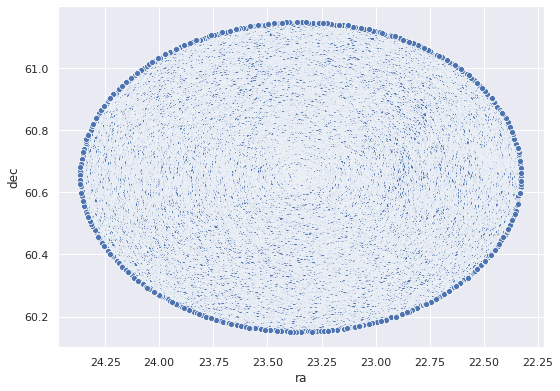

In [6]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [7]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [8]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [11]:
## saving only NGC 581 data from Cantat

cantat_581 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_581")
cantat_581 = cantat_581[0].to_pandas()
cantat_581

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,23.444496,60.711214,509864230674369664,0.4203,-1.305,-0.111,NaN,17.485600,1.7305,0.1,b'NGC_581',23.444507,60.711214
1,23.366839,60.571187,509861447535756416,0.3875,-1.400,-0.631,NaN,15.760600,0.8743,0.9,b'NGC_581',23.366851,60.571189
2,23.139522,60.607261,509850796015034752,0.3732,-0.647,-0.651,NaN,15.411700,1.0211,0.1,b'NGC_581',23.139527,60.607263
3,23.379967,60.647975,509862169084115200,0.3209,-1.256,-0.624,NaN,17.417801,1.1832,0.3,b'NGC_581',23.379978,60.647978
4,23.181250,60.669540,509874538595633152,0.3057,-1.849,-0.380,NaN,16.319901,0.8084,0.1,b'NGC_581',23.181266,60.669541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,23.330910,60.679827,509863028083270656,0.3097,-1.386,-0.559,NaN,11.704800,0.3024,0.6,b'NGC_581',23.330922,60.679829
302,23.256299,60.768428,509876737611440768,0.4223,-0.963,-0.726,NaN,17.515200,1.3165,0.3,b'NGC_581',23.256307,60.768431
303,23.491549,60.548354,509858286439769344,0.3422,-1.321,-0.518,NaN,14.846400,0.6234,1.0,b'NGC_581',23.491561,60.548357
304,23.204670,60.602775,509839079344255744,0.3770,-1.424,-0.456,NaN,14.848400,0.6502,1.0,b'NGC_581',23.204683,60.602777


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_581 = cantat_581.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_581 = cantat_581.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_581 = all_stars.join(cantat_581.set_index('source_id'), on='source_id')

In [15]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_581 = cantat_581.dropna(subset=['PMemb'])
cantat_581

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
12,1635721458409799680,b'Gaia DR2 509862821924860928',509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,21.013781,237.087051,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.049109,-1.809071,49.385338,46.255876,100001.0,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111.0,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006025,0.8
19,1635721458409799680,b'Gaia DR2 509862821924863488',509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,519.192592,716.349060,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.051347,-1.811291,49.385656,46.252732,100002.0,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007321,0.9
24,1635721458409799680,b'Gaia DR2 509862821925154816',509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,20.622400,290.439758,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.060497,-1.804416,49.402157,46.251879,100001.0,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.008056,0.5
32,1635721458409799680,b'Gaia DR2 509862925004366976',509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,109.613381,674.744446,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.061049,-1.801861,49.

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_581.to_csv('NGC_581_cantat.csv')
# all_stars.to_csv('NGC_581_Gaia_30m.csv')

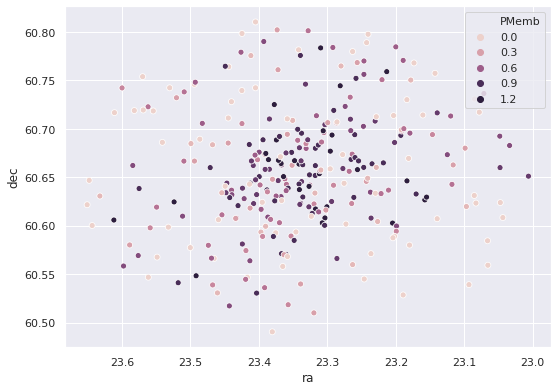

In [17]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_581['ra'], cantat_581['dec'], hue = cantat_581['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_581

In [19]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,3.060000e+02,3.060000e+02,3.060000e+02,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.00000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,304.000000,306.000000,3.040000e+02,304.000000,304.000000,304.000000,304.000000,306.000000,304.000000,304.000000,304.000000,2.000000,2.000000,306.000000,2.000000,2.00000,2.0,306.000000,306.000000,306.000000,306.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,306.000000,306.000000
mean,1.635721e+18,5.098626e+17,8.388721e+08,2015.5,23.338148,0.032784,60.657373,0.037969,0.367088,0.055723,8.868836,-1.380755,0.057194,-0.513928,0.074233,-0.272534,0.136804,-0.439174,0.076196,-0.135245,0.010733,-0.170473,-0.132410,0.210985,-0.500216,439.267974,35.50000,436.068627,3.199346,1.143568,480.972748,0.029338,0.373654,31.0,35.971092,1.578417,0.009249,-0.031323,50.290850,18.977124,...,16.043728,48.905229,1.616151e+05,359.775691,594.256714,15.059451,1.260630,0.026144,0.984293,0.396946,0.587347,-49.753553,0.612721,0.130719,5000.000000,3.75000,0.0,128.047529,-1.797326,49.394807,46.265720,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077981,0.531699
std,0.000000e+00,8.668760e+12,5.028587e+08,0.0,0.127299,0.018223,0.064135,0.021042,0.055632,0.030888,4.948878,0.247077,0.031792,0.205598,0.040478,0.098798,0.085965,0.068483,0.074752,0.079390,0.079848,0.078707,0.088767,0.069855,0.077372,34.633161,117.18077,34.951656,5.007810,4.796666,196.943970,0.087867,1.333602,0.0,73.211388,0.072213,0.005092,0.029402,3.900027,1.075571,...,1.964512,7.807153,1.599325e+06,2954.183702,398.928375,1.689435,0.118281,0.179168,0.363405,0.194832,0.192330,6.258113,0.414016,1.884163,707.106812,1.06066,0.0,0.063648,0.062911,0.086011,0.066857,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044424,0.326645
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,2.143168,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.636639,258.000000,0.00000,248.000000,0.0000

In [20]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

radial_velocity_error             -1.000000
rv_template_teff                  -1.000000
rv_template_logg                  -1.000000
astrometric_pseudo_colour_error   -0.575685
parallax_error                    -0.570649
                                     ...   
phot_rp_mean_flux_over_error       0.496680
astrometric_pseudo_colour          0.516726
parallax_over_error                0.579664
PMemb                              1.000000
radial_velocity                    1.000000
Name: PMemb, Length: 88, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_581_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_581_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [23]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_581_center
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,23.337395,60.657497,0.032510,0.037654,0.366524,0.055337,8.900169,-1.381863,0.056732,-0.514308,0.073665,15.646791,0.984293,0.120382
std,0.127138,0.064067,0.017959,0.020727,0.055353,0.030579,4.949484,0.247453,0.031378,0.204880,0.039963,1.834949,0.363405,0.076529
min,23.006207,60.490513,0.009833,0.011431,0.262340,0.016720,2.143168,-2.238286,0.017891,-1.324815,0.022449,7.150499,0.206042,0.008339
25%,23.259136,60.617206,0.018147,0.021018,0.327232,0.030030,4.759592,-1.456941,0.031234,-0.591231,0.041489,14.826363,0.651663,0.058686
50%,23.341301,60.656477,0.027499,0.032430,0.365686,0.046756,7.756973,-1.388892,0.047928,-0.505842,0.063057,16.092208,1.077444,0.105033
75%,23.412446,60.698078,0.044177,0.051471,0.404136,0.075392,11.972308,-1.303094,0.075108,-0.409261,0.101302,16.987970,1.258529,0.164877
max,23.650652,60.810387,0.080902,0.097384,0.484589,0.136847,24.883711,-0.431452,0.167809,0.124636,0.186430,17.965919,2.482491,0.339630


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

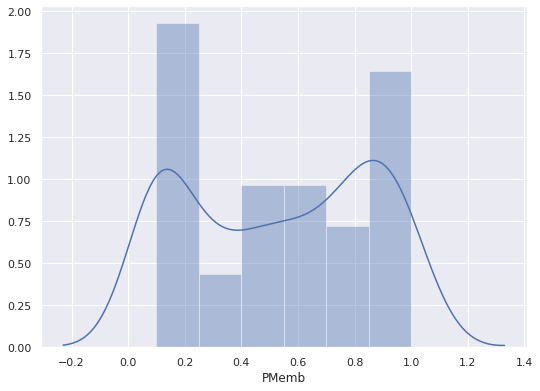

In [25]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [26]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

178

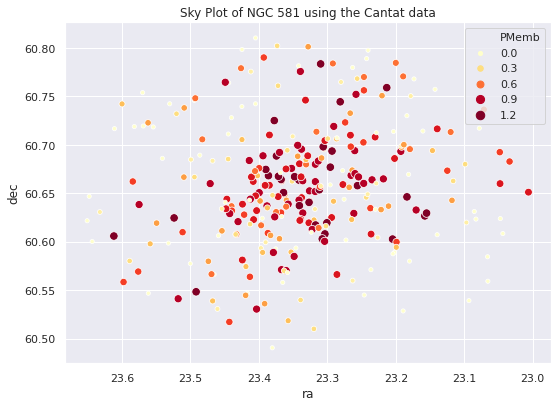

In [27]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 581 using the Cantat data')
plt.show()

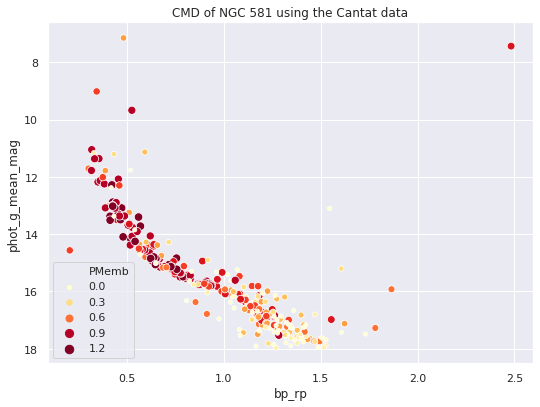

In [28]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 581 using the Cantat data')
plt.show()

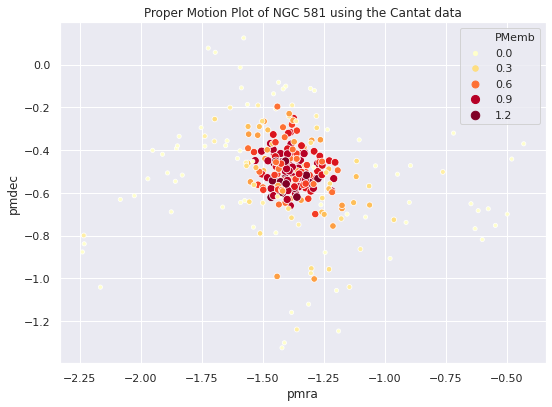

In [29]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 581 using the Cantat data')
plt.show()

In [30]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax_over_error    0.329555
pmdec                  0.229892
pmra                   0.205532
bp_rp                  0.056576
dist_581_center        0.040197
parallax               0.036558
dec                    0.018661
ra                     0.015836
phot_g_mean_mag        0.014776
parallax_error         0.012600
pmdec_error            0.012222
ra_error               0.011571
pmra_error             0.008235
dec_error              0.007789
dtype: float64

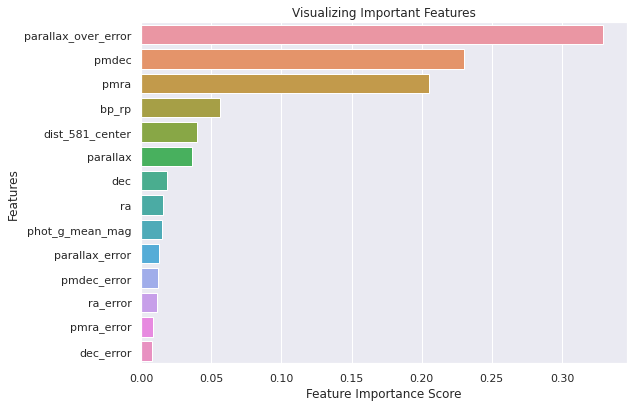

In [32]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [35]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.6300448038835472

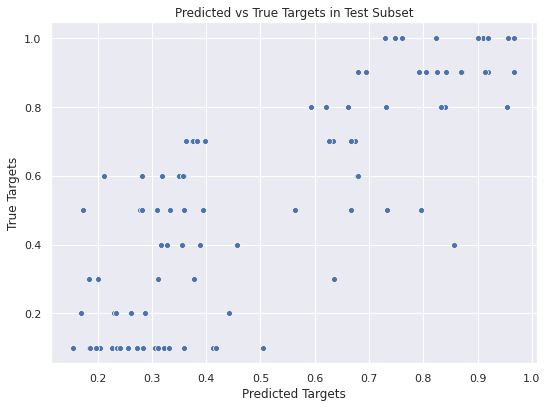

In [37]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [38]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [39]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.2601824453030632, 0.4246958705631341, 0.49867276935364335, 0.5466372162832844, 0.5817699419796785, 0.625032083878608, 0.6663854406298133, 0.6723569532019098, 0.7016791030964207, 0.7156966904051262, 0.7161910506120055, 0.714751662454252, 0.7455691785687236, 0.7537163764396155, 0.7547121926909907, 0.7542111364468994, 0.7506003824852985, 0.7738044010164602, 0.7602482954539079]


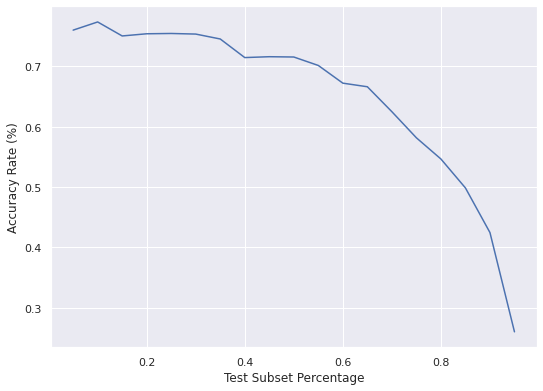

In [40]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [41]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,7.145300e+04,7.145300e+04,7.145300e+04,71453.0,71453.000000,71453.000000,71453.000000,71453.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,71453.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,63785.000000,71453.000000,71453.000000,71453.000000,71453.000000,71453.000000,7.145300e+04,71453.000000,7.145300e+04,71453.000000,71453.000000,63759.000000,63759.000000,71453.000000,71453.000000,71453.000000,...,62477.000000,62477.000000,71453.000000,6.247600e+04,62476.000000,62476.000000,62476.000000,62464.000000,71453.000000,62464.000000,62477.000000,62476.000000,340.000000,340.000000,71453.000000,340.000000,340.000000,340.000000,71453.000000,71453.000000,71453.000000,71453.000000,8948.000000,8948.000000,8948.000000,8948.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,4376.0,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,71453.000000
mean,1.635721e+18,5.099477e+17,8.461005e+08,2015.5,23.348261,0.803167,60.651372,0.849056,0.333630,0.454336,2.843151,-0.627618,0.538765,-0.495349,0.650498,-0.250747,0.055865,-0.439776,0.067550,-0.099901,0.021685,-0.229636,-0.058529,0.157512,-0.491660,378.608946,2.840203,376.352134,2.256812,3.380629,1.159347e+03,0.792197,1.789891e+01,27.995172,3.417133,1.462378,0.074633,-0.030242,43.597484,16.431682,...,90.468559,19.408472,38.416554,6.347859e+03,16.247990,180.427444,17.942757,1.465207,0.105468,1.465756,0.553773,0.911907,-42.134145,1.502308,0.065540,5089.706055,3.386765,-0.027941,128.053223,-1.801535,49.396965,46.258254,100516.528163,4953.473633,4763.933105,5236.819336,1.095891,0.825748,1.452314,0.544164,0.406794,0.726547,200111.0,3.260403,2.930463,3.517266,20.563402,16.938421,24.188347,0.330472
std,0.000000e+00,2.652781e+14,4.877798e+08,0.0,0.510081,2.567549,0.247523,2.630920,0.951632,0.462387,8.888183,4.102716,0.598650,2.753871,0.699631,0.243716,0.172210,0.123050,0.160729,0.145018,0.148495,0.167819,0.170498,0.143519,0.144614,134.633288,34.714755,134.037244,2.872789,16.813223,4.984024e+04,1.703825,6.246135e+02,8.666444,21.631893,0.130702,0.071862,0.056345,15.013735,3.987801,...,248.339828,1.690781,18.973599,1.719308e+05,284.749768,2799.719727,1.597249,0.309720,0.423931,0.345329,0.271933,0.224532,38.971481,1.858289,1.006001,641.230774,0.585948,0.199443,0.249843,0.247797,0.361388,0.247649,2914.676032,761.784607,722.716187,828.200806,0.502818,0.470185,0.572207,0.254141,0.235789,0.292691,0.0,6.858409,6.188082,7.384936,318.917480,263.692413,374.348114,0.120652
min,1.635721e+18,5.094507e+17,5.827000e+03,2015.5,22.326319,0.009403,60.150685,0.0

In [0]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_581_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [45]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


527

In [47]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

527

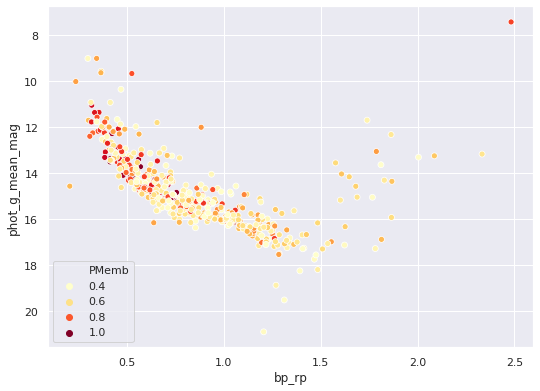

In [48]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

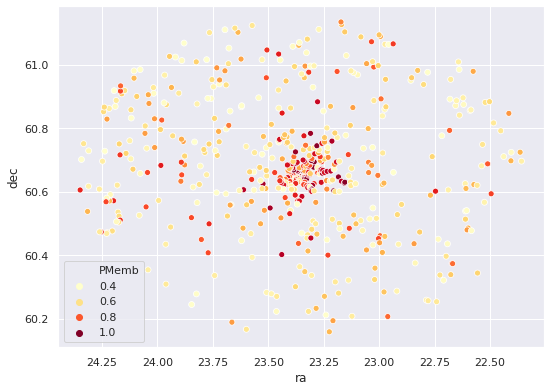

In [49]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

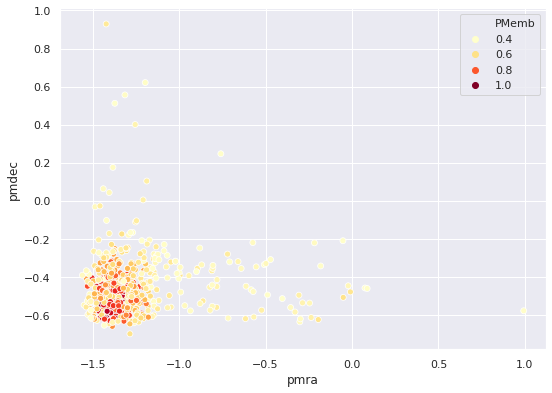

In [50]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [51]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_581_center,PMemb
count,5.270000e+02,5.270000e+02,5.270000e+02,527.0,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.0,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,5.270000e+02,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,10.000000,10.000000,527.000000,10.000000,10.000000,10.0,527.000000,527.000000,527.000000,527.000000,506.000000,506.000000,506.000000,506.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,527.000000,527.000000,527.000000
mean,1.635721e+18,5.099226e+17,8.634573e+08,2015.5,23.388536,0.024000,60.685972,0.027460,0.373095,0.040158,11.478455,-1.251051,0.042235,-0.442696,0.054411,-0.301757,0.113996,-0.452720,0.117898,-0.085859,0.058672,-0.203219,-0.120147,0.183101,-0.526438,456.599620,47.777989,453.377609,3.222011,0.976384,530.934631,0.025342,1.075721,31.0,53.920002,1.605252,0.006710,-0.025243,52.212524,18.982922,...,51.755218,9.536594e+04,173.215304,855.828125,14.365542,1.237708,0.017078,0.843010,0.333995,0.509015,-44.733149,1.316499,0.284630,4850.000000,3.250000,0.0,128.067011,-1.764474,49.447299,46.277181,100024.752964,6115.601074,5850.467773,6453.670898,1.066032,0.746650,1.380533,0.532749,0.370952,0.689674,200111.0,3.985204,3.595131,4.332525,71.076630,59.257259,82.896027,0.248201,0.391784,0.670410
std,0.000000e+00,2.156888e+14,4.777154e+08,0.0,0.435800,0.040110,0.201494,0.044330,0.259227,0.062683,4.786609,0.297233,0.068372,0.164778,0.082842,0.087797,0.087130,0.065689,0.077853,0.083958,0.085054,0.089954,0.093038,0.082686,0.072339,39.844625,136.476930,39.699198,4.844154,7.580263,812.485474,0.226318,14.089148,0.0,84.941910,0.073326,0.011299,0.029178,4.458127,0.913405,...,6.625998,1.049931e+06,1919.978581,389.988281,1.460738,0.101716,0.129684,0.349314,0.186851,0.181478,35.961487,1.953914,2.255245,529.674988,0.485913,0.0,0.210183,0.204879,0.315489,0.196331,216.884429,1097.263184,1034.580200,1163.904907,0.312598,0.319758,0.324687,0.154321,0.159501,0.159952,0.0,15.324659,13.927765,16.473391,745.486633,631.998718,859.083984,0.161775,0.282592,0.139719
min,1.635721e+18,5.094518e+17,2.885440e+05,2015.5,22.358945,0.009823,60.158264,0.010896,0.177696,0.015332,0.882074,-1.560029,0.017217,-0.699272,0.021665,-0.561925,-0.135282,-0.653858,-0.112471,-0.461236,-0.197530,-0.484075,-0.444580,-0.092382,-0.688867,216.000000,0.000000,216.

In [52]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_581_center
count,3.060000e+02,3.060000e+02,3.060000e+02,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.00000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,3.040000e+02,304.000000,304.000000,304.000000,304.000000,306.000000,304.000000,304.000000,304.000000,2.000000,2.000000,306.000000,2.000000,2.00000,2.0,306.000000,306.000000,306.000000,306.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,306.000000,306.000000,306.000000
mean,1.635721e+18,5.098626e+17,8.388721e+08,2015.5,23.338148,0.032784,60.657373,0.037969,0.367088,0.055723,8.868836,-1.380755,0.057194,-0.513928,0.074233,-0.272534,0.136804,-0.439174,0.076196,-0.135245,0.010733,-0.170473,-0.132410,0.210985,-0.500216,439.267974,35.50000,436.068627,3.199346,1.143568,480.972748,0.029338,0.373654,31.0,35.971092,1.578417,0.009249,-0.031323,50.290850,18.977124,...,48.905229,1.616151e+05,359.775691,594.256714,15.059451,1.260630,0.026144,0.984293,0.396946,0.587347,-49.753553,0.612721,0.130719,5000.000000,3.75000,0.0,128.047529,-1.797326,49.394807,46.265720,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077981,0.531699,0.120512
std,0.000000e+00,8.668760e+12,5.028587e+08,0.0,0.127299,0.018223,0.064135,0.021042,0.055632,0.030888,4.948878,0.247077,0.031792,0.205598,0.040478,0.098798,0.085965,0.068483,0.074752,0.079390,0.079848,0.078707,0.088767,0.069855,0.077372,34.633161,117.18077,34.951656,5.007810,4.796666,196.943970,0.087867,1.333602,0.0,73.211388,0.072213,0.005092,0.029402,3.900027,1.075571,...,7.807153,1.599325e+06,2954.183702,398.928375,1.689435,0.118281,0.179168,0.363405,0.194832,0.192330,6.258113,0.414016,1.884163,707.106812,1.06066,0.0,0.063648,0.062911,0.086011,0.066857,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044424,0.326645,0.076559
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,2.143168,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.636639,258.000000,0.00000,248.000000,0.000000

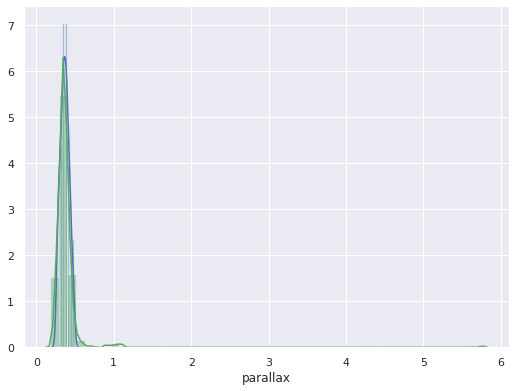

In [53]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_581_membership_prob.csv')
potentialMember.to_csv('NGC_581_membership_prob.csv')



### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [56]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_581_center,PMemb,dataset
12,1635721458409799680,b'Gaia DR2 509862821924860928',509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.049109,-1.809071,49.385338,46.255876,100001.0,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111.0,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006025,0.009448,0.818,New_member
15,1635721458409799680,b'Gaia DR2 509862821924863104',509862821924863104,1432153731,2015.5,23.345440,0.017843,60.643454,0.020889,0.254837,0.030242,8.426500,-1.194531,0.030927,-0.331876,0.040420,-0.287286,0.189279,-0.370151,0.060091,-0.176463,-0.002834,-0.122080,-0.151731,0.204792,-0.509579,433,0,431,2,-2.156400,365.503632,0.000000,0.000000,31,False,18.381409,1.599227,0.005177,-0.016741,...,14.666911,1.237541,0,0.887876,0.343622,0.544253,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.053308,-1.810545,49.388500,46.252002,100001.0,5457.886719,5356.600098,5947.649902,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.482077,2.932221,3.615006,9.693254,6.907546,12.478964,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006549,0.006558,0.655,New_member
19,1635721458409799680,b'Gaia DR2 509862821924863488',509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.051347,-1.811291,49.385656,46.252732,100002.0,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007321,0.008339,0.900,New_member
24,1635721458409799680,b'Gaia DR2 509862821925154816',509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',128.060497,-1.804416,49.402157,46.2518

In [66]:
concatenated.dataset.value_counts()

New_member    527
Old_member    178
Name: dataset, dtype: int64

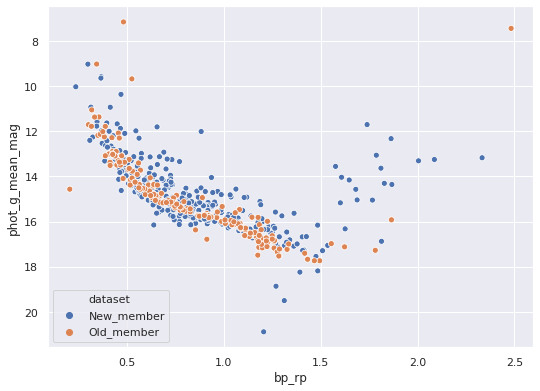

In [57]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

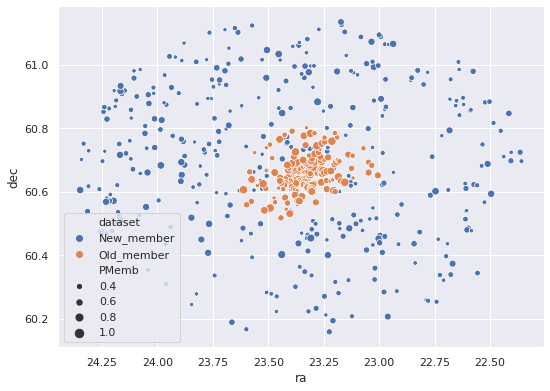

In [58]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

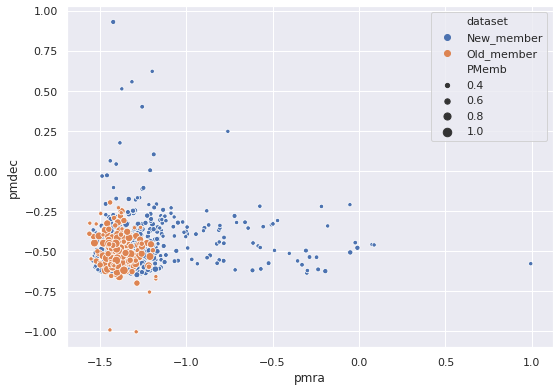

In [59]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
import time
time.sleep(150)

In [0]:
files.download('NGC_581_cantat.csv')
files.download('NGC_581_membership_prob.csv')